In [ ]:
"""
Purpose: To Compare how the new rules do when proofreading a cell

"""

# The procedure when proofreadig the cell

In [ ]:
"""
1) Downloads the neuorn
2) Apply the New Proofreading rules to the cell (that just creates a new limb brnach dict)
3) Do the synapse Filtering
4) Get the synapses that should belong
5) Compare and give a score

"""

In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-20 02:15:04,861 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 02:15:04,863 - settings - Setting database.user to celiib
INFO - 2021-04-20 02:15:04,864 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 02:15:04,867 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-20 02:15:04,869 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 02:15:04,882 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-20 02:15:05,314 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 02:15:05,317 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 02:15:05,318 - settings - Setting database.user to celiib
INFO - 2021-04-20 02:15:05,319 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 02:15:05,320 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 02:15:05,320 - settings - Setting database.user to celiib
INFO - 2021-04-20 02:15:05,321 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 02:15:05,322 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 02:15:05,765 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-20 02:16:58,830 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 02:16:58,833 - settings - Setting database.user to celiib
INFO - 2021-04-20 02:16:58,834 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 02:16:58,838 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 02:16:59,366 - settings - Setting enable_python_native_blobs to True


In [85]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru

# Downloading the neuron and the synapse information

In [ ]:
segment_id = 864691136311791677
segment_id = 864691135645592260

In [92]:
minnie.AutoProofreadValidationBorderNeurons() & f"segment_id = {segment_id}"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,decomposition
864691136311791677,0,0.25,30.00,5,0,0,3,=BLOB=


In [9]:
neuron_obj = du.fetch_neuron_obj_manual(segment_id=segment_id,
                                       border_validation=True)

Decompressing Neuron in minimal output mode...please wait


In [10]:
validation_df = vu.synapse_validation_df_single_neuron(segment_id,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False)

Synapsse Results:
Total Number of Synapses = 7459
n_valid_syn_ids_presyn = 176
n_errored_syn_ids_presyn = 270
n_valid_syn_ids_postsyn = 6896
n_errored_syn_ids_postsyn = 117


In [11]:
validation_df

,synapse_id,synapse_type,auto_valid,synapse_x,synapse_y,synapse_z,manual_valid,category,old_segment_id,new_segment_id,euclidean_distance_to_nuclei
0,200140198,presyn,True,803444,792224,978600,True,TP,864691136311791677,864691135497743635,611655.979662
1,200140435,presyn,True,804792,791640,974480,True,TP,864691136311791677,864691135497743635,608971.709451
2,204085515,presyn,True,808960,789816,970560,True,TP,864691136311791677,864691135497743635,603435.856913
3,210185918,presyn,True,822176,785808,944960,True,TP,864691136311791677,864691135497743635,582923.562742
4,210282162,presyn,True,819760,788240,961080,True,TP,864691136311791677,864691135497743635,590612.596412
...,...,...,...,...,...,...,...,...,...,...,...
7454,426556338,postsyn,False,1345416,590504,754080,True,FN,864691136311791677,864691135497743635,55499.085974
7455,439176646,postsyn,False,1386208,543936,796960,True,FN,864691136311791677,864691135497743635,57739.775407
7456,439176781,postsyn,False,1387128,545064,797120,True,FN,864691136311791677,864691135497743635,58612.885955
7457,439283160,postsyn,False,1388464,543776,799840,True,FN,864691136311791677,864691135497743635,60573.739525


# Processing the Neuron

In [14]:
ver = 0.08
nucleus_ids,nucleus_centers = du.segment_to_nuclei(segment_id,
                                                       nuclei_version=ver)
nucleus_ids

array([583848])

# Exploring the Better Crossover

In [ ]:
pru.edges_to_create_and_delete_crossover #finds the edges to cut
pru.crossover_elimination_limb_branch_dict # turns the edges information into limb branch dict elimination
pru.filter_away_crossovers # filters away the limb branch dict

In [84]:
nviz = reload(nviz)

NameError: name 'nviz' is not defined

In [86]:
nviz.plot_axon(neuron_obj_test)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [90]:
crossover_coordinates = nru.high_degree_branching_coordinates_on_limb(neuron_obj_test[1],
                                                                      min_degree_to_find=4,
                                                                         exactly_equal=True,
                                                                         )
crossover_coordinates.shape

(17, 3)

In [91]:
nviz.add_scatter_to_current_plot(scatters=[crossover_coordinates],
                                scatters_colors=["red"],
                                 scatter_size=0.2
                                )

In [82]:
from copy import deepcopy
neuron_obj_test = deepcopy(neuron_obj)

In [106]:
branch_list = [286,294,296,297]
for b in branch_list:
    print(f"{b}: {neuron_obj_test[1][b].width_new}")

286: {'median_mesh_center': 58.41032418314019, 'no_spine_median_mesh_center': 58.41032418314019, 'no_bouton_median': 57.68264722043223}
294: {'median_mesh_center': 74.93190555175075, 'no_spine_median_mesh_center': 74.93190555175075, 'no_bouton_median': 67.13004588931672}
296: {'median_mesh_center': 56.592974459011906, 'no_spine_median_mesh_center': 56.592974459011906, 'no_bouton_median': 56.592974459011906}
297: {'median_mesh_center': 96.59089438478281, 'no_spine_median_mesh_center': 96.59089438478281, 'no_bouton_median': 96.59089438478281}


In [110]:
nviz.visualize_neuron(neuron_obj_test,
                      limb_branch_dict=dict(L1=[286,294,296,297]),
                      mesh_soma=False,
                      skeleton_soma=False,
                     mesh_color=dict(L1={286:"red",
                                        294:"green",
                                        296:"aqua",
                                        297:"purple"}),
                     skeleton_color=dict(L1={286:"red",
                                        294:"green",
                                        296:"aqua",
                                        297:"purple"}))


 Working on visualization type: mesh

 Working on visualization type: skeleton


coordinate_branches = [22, 36, 37, 40]
22 = red
36 = aqua
37 = purple
40 = green


Angle between 22 and 36 = 165.51 
Angle between 22 and 37 = 42.49 
Angle between 22 and 40 = 12.46 
Angle between 36 and 37 = 52.86 
Angle between 36 and 40 = 23.96 
Angle between 37 and 40 = 133.3 
Final Matches = [[22, 37], [22, 40], [36, 40]]
matched_branches_revised = [[22, 40]]
Aligned Skeleton Parts


Original graph


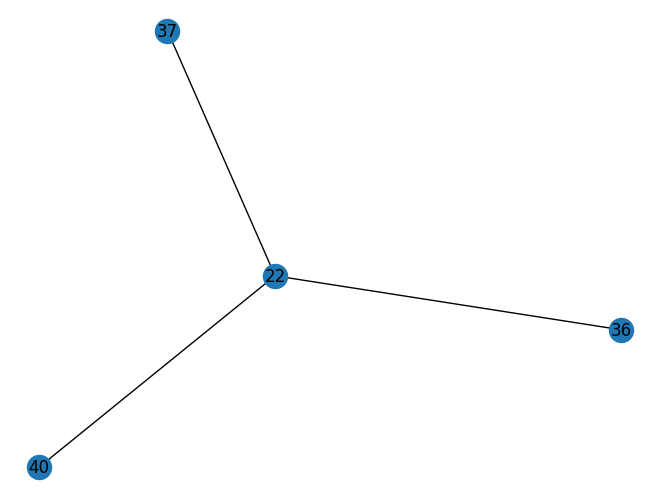

match_branches = [[22, 40]]
edges_to_delete (resolve crossover) = [[22, 36], [22, 37], [36, 37], [36, 40], [37, 40]]
edges_to_create (resolve crossover) = [[22, 40]]
coordinate_branches = [52, 53, 54, 55]
52 = red
53 = aqua
54 = purple
55 = green


Angle between 52 and 53 = 124.86 
Angle between 52 and 54 = 44.37 
Angle between 52 and 55 = 37.81 
Angle between 53 and 54 = 10.79 
Angle between 53 and 55 = 78.05 
Angle between 54 and 55 = 111.19 
Final Matches = [[52, 54], [52, 55], [53, 54]]
matched_branches_revised = [[53, 54], [52, 55]]
Aligned Skeleton Parts


Original graph


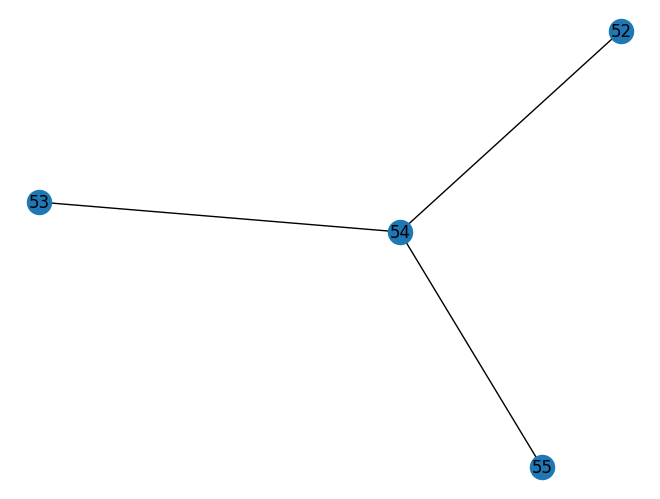

match_branches = [[53, 54], [52, 55]]
edges_to_delete (resolve crossover) = [[52, 53], [52, 54], [53, 55], [54, 55]]
edges_to_create (resolve crossover) = [[53, 54], [52, 55]]
coordinate_branches = [74, 86, 95, 98]
74 = red
86 = aqua
95 = purple
98 = green


Angle between 74 and 86 = 127.35 
Angle between 74 and 95 = 63.22 
Angle between 74 and 98 = 23.5 
Angle between 86 and 95 = 112.04 
Angle between 86 and 98 = 33.51 
Angle between 95 and 98 = 93.36 
Final Matches = [[74, 98], [86, 98]]
matched_branches_revised = [[74, 98]]
Aligned Skeleton Parts


Original graph


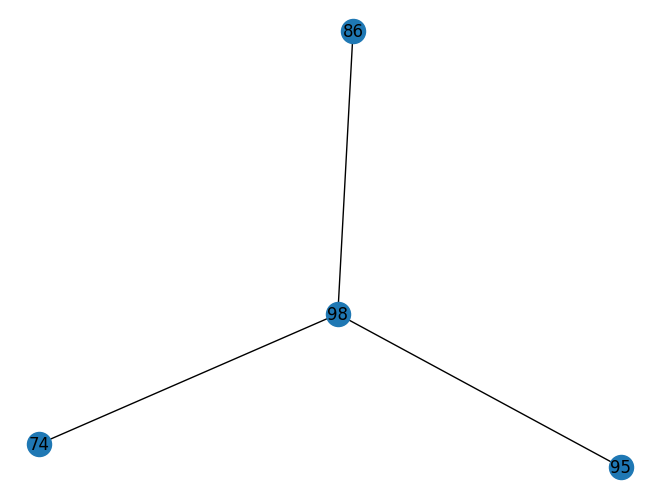

match_branches = [[74, 98]]
edges_to_delete (resolve crossover) = [[74, 86], [74, 95], [86, 95], [86, 98], [95, 98]]
edges_to_create (resolve crossover) = [[74, 98]]
coordinate_branches = [99, 107, 110, 111]
99 = red
107 = aqua
110 = purple
111 = green


Angle between 99 and 107 = 107.19 
Angle between 99 and 110 = 20.13 
Angle between 99 and 111 = 77.01 
Angle between 107 and 110 = 90.59 
Angle between 107 and 111 = 20.2 
Angle between 110 and 111 = 83.07 
Final Matches = [[99, 110], [107, 111]]
matched_branches_revised = [[99, 110], [107, 111]]
Aligned Skeleton Parts


Original graph


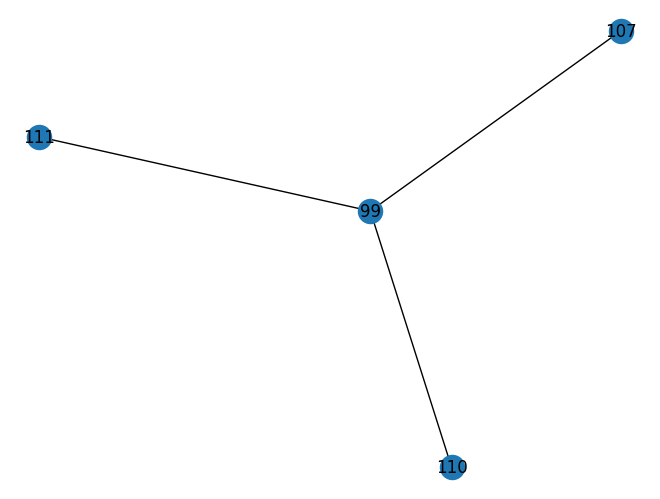

match_branches = [[99, 110], [107, 111]]
edges_to_delete (resolve crossover) = [[99, 107], [99, 111], [107, 110], [110, 111]]
edges_to_create (resolve crossover) = [[99, 110], [107, 111]]
coordinate_branches = [113, 114, 119, 121]
113 = red
114 = aqua
119 = purple
121 = green


Angle between 113 and 114 = 47.51 
Angle between 113 and 119 = 3.82 
Angle between 113 and 121 = 128.0 
Angle between 114 and 119 = 132.29 
Angle between 114 and 121 = 40.76 
Angle between 119 and 121 = 48.99 
Final Matches = [[113, 119], [114, 121]]
matched_branches_revised = [[113, 119], [114, 121]]
Aligned Skeleton Parts


Original graph


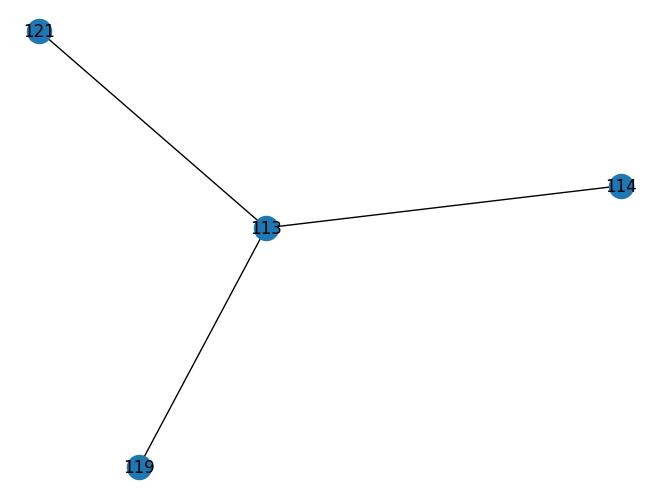

match_branches = [[113, 119], [114, 121]]
edges_to_delete (resolve crossover) = [[113, 114], [113, 121], [114, 119], [119, 121]]
edges_to_create (resolve crossover) = [[113, 119], [114, 121]]
coordinate_branches = [128, 132, 133, 134]
128 = red
132 = aqua
133 = purple
134 = green


Angle between 128 and 132 = 101.76 
Angle between 128 and 133 = 41.53 
Angle between 128 and 134 = 10.55 
Angle between 132 and 133 = 37.32 
Angle between 132 and 134 = 80.59 
Angle between 133 and 134 = 136.71 
Final Matches = [[128, 133], [128, 134], [132, 133]]
matched_branches_revised = [[128, 134], [132, 133]]
Aligned Skeleton Parts


Original graph


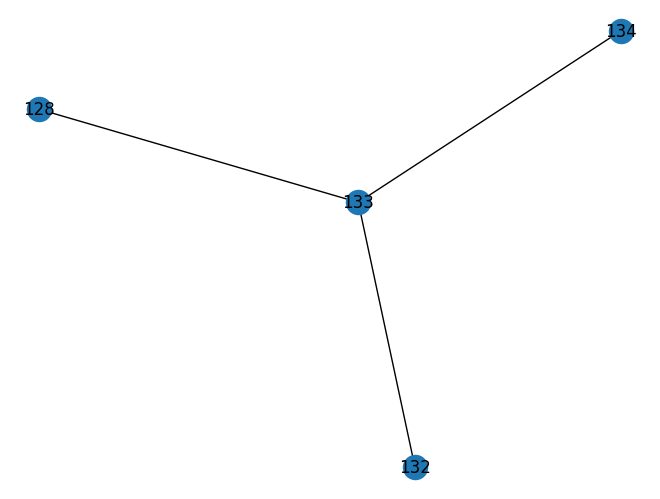

match_branches = [[128, 134], [132, 133]]
edges_to_delete (resolve crossover) = [[128, 132], [128, 133], [132, 134], [133, 134]]
edges_to_create (resolve crossover) = [[128, 134], [132, 133]]
coordinate_branches = [116, 130, 140, 142]
116 = red
130 = aqua
140 = purple
142 = green


Angle between 116 and 130 = 18.51 
Angle between 116 and 140 = 36.94 
Angle between 116 and 142 = 146.17 
Angle between 130 and 140 = 149.29 
Angle between 130 and 142 = 51.45 
Angle between 140 and 142 = 53.04 
Final Matches = [[116, 130], [116, 140]]
matched_branches_revised = [[116, 130]]
Aligned Skeleton Parts


Original graph


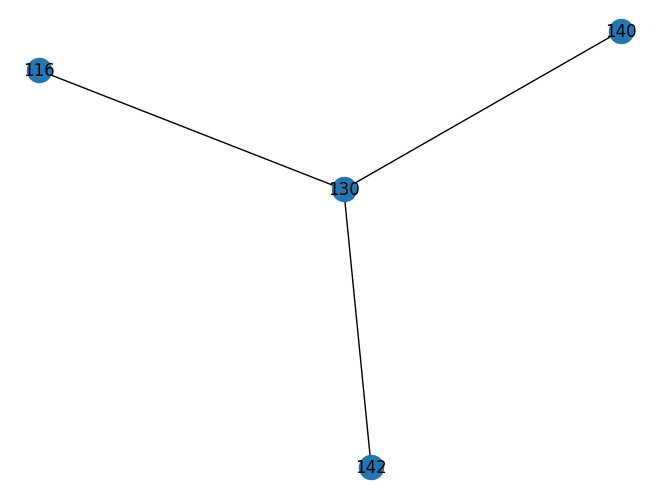

match_branches = [[116, 130]]
edges_to_delete (resolve crossover) = [[116, 140], [116, 142], [130, 140], [130, 142], [140, 142]]
edges_to_create (resolve crossover) = [[116, 130]]
coordinate_branches = [149, 158, 160, 162]
149 = red
158 = aqua
160 = purple
162 = green


Angle between 149 and 158 = 47.67 
Angle between 149 and 160 = 139.5 
Angle between 149 and 162 = 54.68 
Angle between 158 and 160 = 11.75 
Angle between 158 and 162 = 123.41 
Angle between 160 and 162 = 45.89 
Final Matches = [[158, 160]]
matched_branches_revised = [[158, 160]]
Aligned Skeleton Parts


Original graph


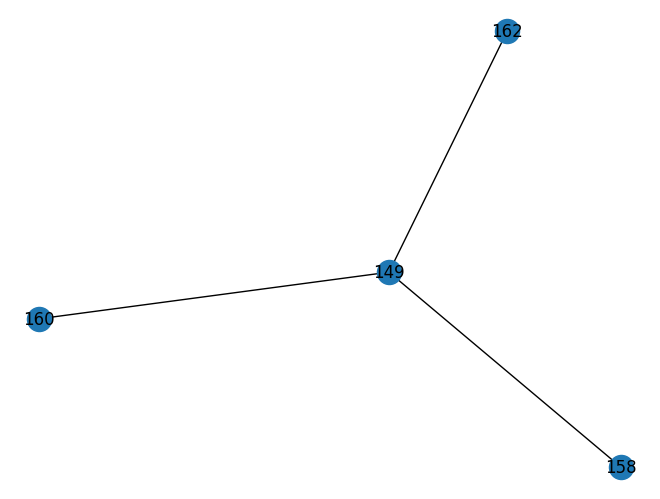

match_branches = [[158, 160]]
edges_to_delete (resolve crossover) = [[149, 158], [149, 160], [149, 162], [158, 162], [160, 162]]
edges_to_create (resolve crossover) = [[158, 160]]
coordinate_branches = [178, 189, 207, 208]
178 = red
189 = aqua
207 = purple
208 = green


Angle between 178 and 189 = 133.32 
Angle between 178 and 207 = 113.58 
Angle between 178 and 208 = 31.43 
Angle between 189 and 207 = 87.12 
Angle between 189 and 208 = 61.82 
Angle between 207 and 208 = 35.99 
Final Matches = [[178, 208], [207, 208]]
matched_branches_revised = [[178, 208]]
Aligned Skeleton Parts


Original graph


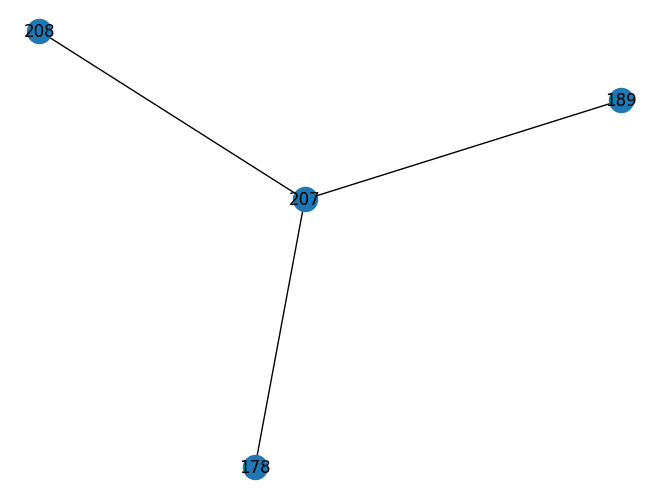

match_branches = [[178, 208]]
edges_to_delete (resolve crossover) = [[178, 189], [178, 207], [189, 207], [189, 208], [207, 208]]
edges_to_create (resolve crossover) = [[178, 208]]
coordinate_branches = [184, 210, 213, 218]
184 = red
210 = aqua
213 = purple
218 = green


Angle between 184 and 210 = 79.92 
Angle between 184 and 213 = 32.75 
Angle between 184 and 218 = 20.64 
Angle between 210 and 213 = 126.5 
Angle between 210 and 218 = 120.52 
Angle between 213 and 218 = 163.62 
Final Matches = [[184, 213], [184, 218]]
matched_branches_revised = [[184, 218]]
Aligned Skeleton Parts


Original graph


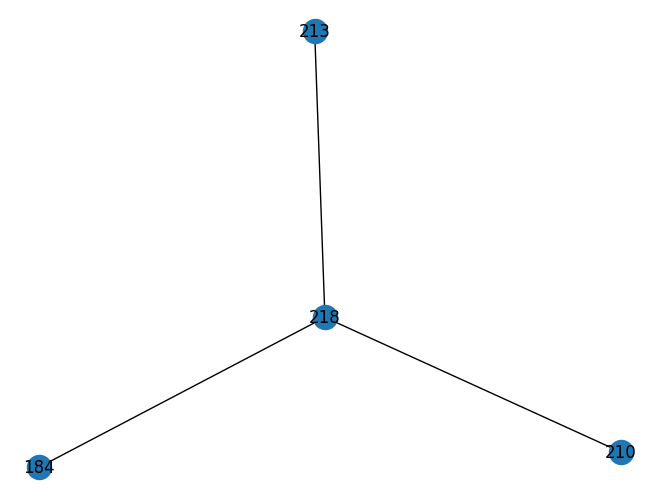

match_branches = [[184, 218]]
edges_to_delete (resolve crossover) = [[184, 210], [184, 213], [210, 213], [210, 218], [213, 218]]
edges_to_create (resolve crossover) = [[184, 218]]
coordinate_branches = [206, 208, 216, 217]
206 = red
208 = aqua
216 = purple
217 = green


Angle between 206 and 208 = 150.32 
Angle between 206 and 216 = 52.01 
Angle between 206 and 217 = 24.0 
Angle between 208 and 216 = 23.3 
Angle between 208 and 217 = 52.48 
Angle between 216 and 217 = 104.48 
Final Matches = [[206, 217], [208, 216]]
matched_branches_revised = [[208, 216], [206, 217]]
Aligned Skeleton Parts


Original graph


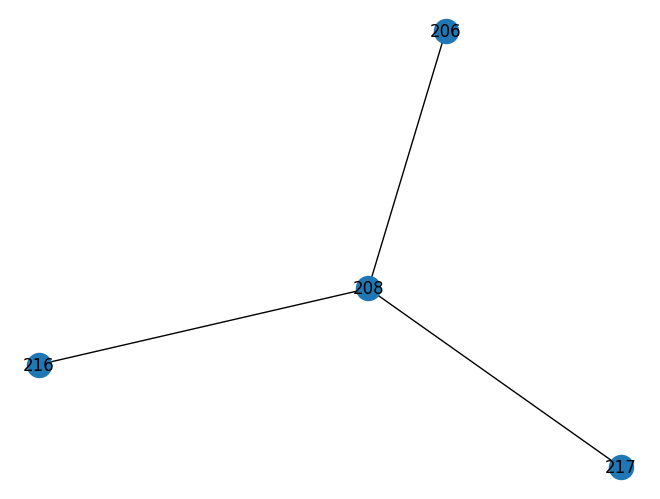

match_branches = [[208, 216], [206, 217]]
edges_to_delete (resolve crossover) = [[206, 208], [206, 216], [208, 217], [216, 217]]
edges_to_create (resolve crossover) = [[208, 216], [206, 217]]
coordinate_branches = [207, 215, 225, 226]
207 = red
215 = aqua
225 = purple
226 = green


Angle between 207 and 215 = 75.96 
Angle between 207 and 225 = 13.44 
Angle between 207 and 226 = 108.97 
Angle between 215 and 225 = 117.38 
Angle between 215 and 226 = 15.58 
Angle between 225 and 226 = 58.67 
Final Matches = [[207, 225], [215, 226]]
matched_branches_revised = [[207, 225], [215, 226]]
Aligned Skeleton Parts


Original graph


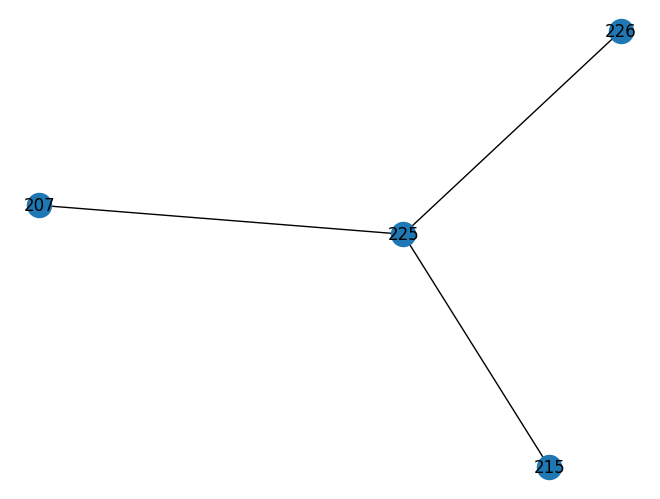

match_branches = [[207, 225], [215, 226]]
edges_to_delete (resolve crossover) = [[207, 215], [207, 226], [215, 225], [225, 226]]
edges_to_create (resolve crossover) = [[207, 225], [215, 226]]
coordinate_branches = [219, 224, 229, 230]
219 = red
224 = aqua
229 = purple
230 = green


Angle between 219 and 224 = 48.67 
Angle between 219 and 229 = 8.94 
Angle between 219 and 230 = 92.98 
Angle between 224 and 229 = 133.63 
Angle between 224 and 230 = 43.58 
Angle between 229 and 230 = 87.71 
Final Matches = [[219, 229], [224, 230]]
matched_branches_revised = [[219, 229], [224, 230]]
Aligned Skeleton Parts


Original graph


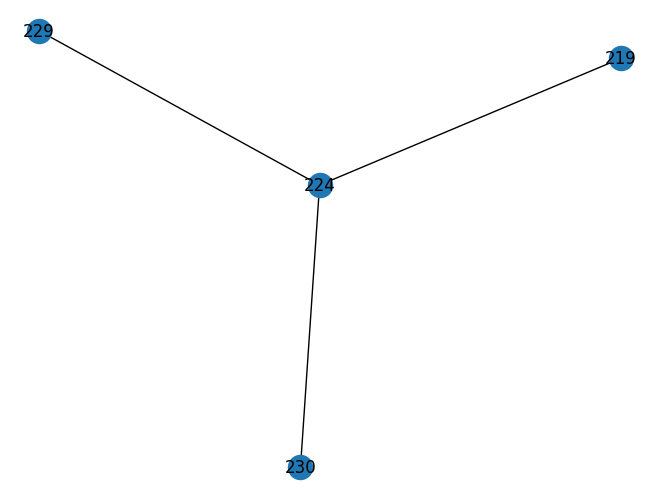

match_branches = [[219, 229], [224, 230]]
edges_to_delete (resolve crossover) = [[219, 224], [219, 230], [224, 229], [229, 230]]
edges_to_create (resolve crossover) = [[219, 229], [224, 230]]
coordinate_branches = [119, 259, 262, 263]
119 = red
259 = aqua
262 = purple
263 = green


Angle between 119 and 259 = 22.18 
Angle between 119 and 262 = 91.09 
Angle between 119 and 263 = 37.41 
Angle between 259 and 262 = 68.51 
Angle between 259 and 263 = 120.92 
Angle between 262 and 263 = 125.93 
Final Matches = [[119, 259], [119, 263]]
matched_branches_revised = [[119, 259]]
Aligned Skeleton Parts


Original graph


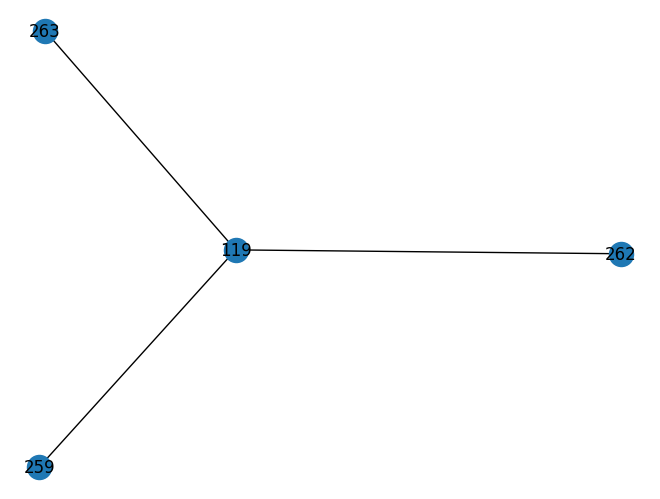

match_branches = [[119, 259]]
edges_to_delete (resolve crossover) = [[119, 262], [119, 263], [259, 262], [259, 263], [262, 263]]
edges_to_create (resolve crossover) = [[119, 259]]
coordinate_branches = [271, 274, 275, 276]
271 = red
274 = aqua
275 = purple
276 = green


Angle between 271 and 274 = 99.44 
Angle between 271 and 275 = 110.58 
Angle between 271 and 276 = 23.24 
Angle between 274 and 275 = 36.13 
Angle between 274 and 276 = 94.57 
Angle between 275 and 276 = 50.81 
Final Matches = [[271, 276], [274, 275]]
matched_branches_revised = [[271, 276], [274, 275]]
Aligned Skeleton Parts


Original graph


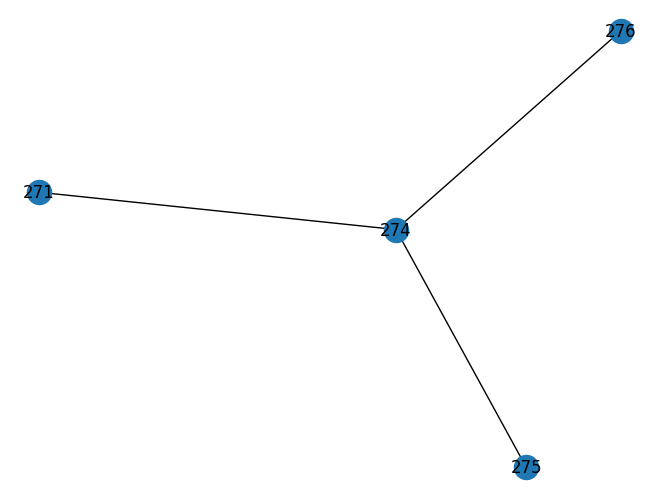

match_branches = [[271, 276], [274, 275]]
edges_to_delete (resolve crossover) = [[271, 274], [271, 275], [274, 276], [275, 276]]
edges_to_create (resolve crossover) = [[271, 276], [274, 275]]
coordinate_branches = [277, 279, 281, 282]
277 = red
279 = aqua
281 = purple
282 = green


Angle between 277 and 279 = 28.67 
Angle between 277 and 281 = 99.13 
Angle between 277 and 282 = 65.17 
Angle between 279 and 281 = 66.58 
Angle between 279 and 282 = 110.19 
Angle between 281 and 282 = 37.75 
Final Matches = [[277, 279], [281, 282]]
matched_branches_revised = [[277, 279], [281, 282]]
Aligned Skeleton Parts


Original graph


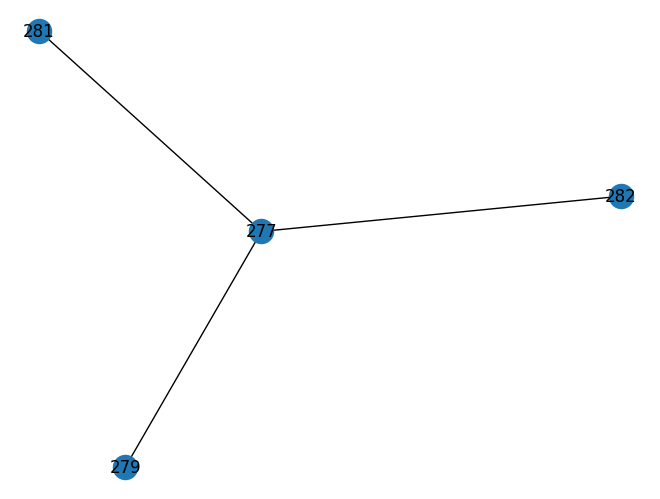

match_branches = [[277, 279], [281, 282]]
edges_to_delete (resolve crossover) = [[277, 281], [277, 282], [279, 281], [279, 282]]
edges_to_create (resolve crossover) = [[277, 279], [281, 282]]
coordinate_branches = [286, 294, 296, 297]
286 = red
294 = aqua
296 = purple
297 = green


Angle between 286 and 294 = 14.66 
Angle between 286 and 296 = 138.48 
Angle between 286 and 297 = 35.22 
Angle between 294 and 296 = 27.09 
Angle between 294 and 297 = 139.25 
Angle between 296 and 297 = 54.38 
Final Matches = [[286, 294], [286, 297], [294, 296]]
matched_branches_revised = [[286, 294]]
Aligned Skeleton Parts


Original graph


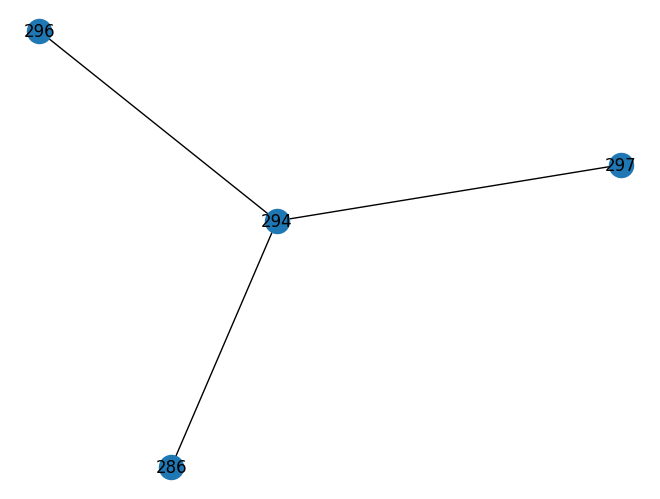

match_branches = [[286, 294]]
edges_to_delete (resolve crossover) = [[286, 296], [286, 297], [294, 296], [294, 297], [296, 297]]
edges_to_create (resolve crossover) = [[286, 294]]


([[53, 54],
  [52, 55],
  [99, 110],
  [107, 111],
  [113, 119],
  [114, 121],
  [128, 134],
  [132, 133],
  [208, 216],
  [206, 217],
  [207, 225],
  [215, 226],
  [219, 229],
  [224, 230],
  [271, 276],
  [274, 275],
  [277, 279],
  [281, 282]],
 [[52, 53],
  [52, 54],
  [53, 55],
  [54, 55],
  [99, 107],
  [99, 111],
  [107, 110],
  [110, 111],
  [113, 114],
  [113, 121],
  [114, 119],
  [119, 121],
  [128, 132],
  [128, 133],
  [132, 134],
  [133, 134],
  [206, 208],
  [206, 216],
  [208, 217],
  [216, 217],
  [207, 215],
  [207, 226],
  [215, 225],
  [225, 226],
  [219, 224],
  [219, 230],
  [224, 229],
  [229, 230],
  [271, 274],
  [271, 275],
  [274, 276],
  [275, 276],
  [277, 281],
  [277, 282],
  [279, 281],
  [279, 282]])

In [111]:
pru.edges_to_create_and_delete_crossover(
                                        neuron_obj_test[1],
                                        high_degree_offset = 1500,
                                        comparison_distance = 2000,
    
                                        match_threshold = 45,
                                        axon_dependent = True,
                                        require_two_pairs = True,
                                        verbose = False,
                                        )

In [ ]:
limb_edge_dict = dict()
for limb_name in neuron_obj.get_limb_node_names():

    limb_obj = neuron_obj[limb_name]

    edges_to_create,edges_to_delete = edge_function(limb_obj,
                                      verbose=verbose,**kwargs)

    if verbose:
        print(f"\n--- Working on Limb {limb_name} ---\n"
             f"edges_to_create = {edges_to_create}\n"
             f"edges_to_create = {edges_to_create}")

    edges_to_create = list(nu.unique_rows(edges_to_create))
    edges_to_delete = list(nu.unique_rows(edges_to_delete))

    if len(edges_to_create)>0 or len(edges_to_delete):
        limb_edge_dict[limb_name] = dict(edges_to_create=edges_to_create,
                                        edges_to_delete=edges_to_delete)

# doing the new filtering

In [62]:
exc_crossovers_filter = pru.make_filter_dict("crossovers",
                                                         pru.filter_away_crossovers,
                                                          dict(axon_dependent=True,
                                                              match_threshold = 30)
                                                         )
    
exc_high_degree_coordinates_filter = pru.make_filter_dict("high_degree_coordinates",
                                                         pru.filter_away_high_degree_coordinates,
                                                          dict(axon_dependent=True,min_degree_to_find=4)
                                                         )

exc_axon_on_dendrite_merges_filter = pru.make_filter_dict("axon_on_dendrite_merges",
                                         pru.filter_away_axon_on_dendrite_merges,
                                         dict(use_pre_existing_axon_labels=True)
                                              
                                        )

exc_low_branch_clusters_filter = pru.make_filter_dict("low_branch_clusters",
                                            pru.filter_away_low_branch_length_clusters,
                                            dict())

filter_list = [
    exc_axon_on_dendrite_merges_filter,
    exc_crossovers_filter,
    exc_high_degree_coordinates_filter,
    
    ]

In [65]:
from importlib import reload
pru = reload(pru)

In [75]:
#filtered_neuron = neuron_obj
filtered_neuron,filtering_info = pru.proofread_neuron_class_predetermined(neuron_obj,
    inh_exc_class="excitatory",
    perform_axon_classification=False,
                                         
    plot_limb_branch_filter_with_disconnect_effect = True,

    
    plot_final_filtered_neuron = False,

    #arguments for the axon high fidelity:
    plot_new_axon_limb_correspondence = False,
    plot_new_limb_object = False,
    plot_final_revised_axon_branch = False,

    verbose = False,
    verbose_outline = True,
    #filter_list = filter_list
    high_fidelity_axon_on_excitatory = True,
                                                                         )




 Using high_fidelity_axon_on_excitatory


---Step 1: Applying Dendrite on Axon Filtering

--- Working on filter 0:
function = dendrite_on_axon_merges
function __name__ = filter_away_dendrite_on_axon_merges
function arguments = {'use_pre_existing_axon_labels': True}





 ---- Total time for applying filter: 7.2621238231658936 -----


---- Step 2: Applying High Fidelity Axon -----
Starting axon branch was the starting node so using border vertices and NOT computing upstream branch
upstream_node_to_axon_starting_branch = None
root_curr = [1330917.  555807.  786429.]
Time for preparing soma vertices and root: 0.0009057521820068359
invalidation_d = 2000
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/260689 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:19<00:00, 19.82s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 21.888715505599976
branches_touching_root = [24]
combining close nodes
combine_threshold = 1300
length of Graph = 61741
After combining close endpoints max(kept_branches_idx) = 321, len(kept_branches_idx) = 300
empty_indices % = 0.0
 conflict_indices % = 0.011852159900192338


  0%|          | 0/137 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/300 [00:00<?, ?it/s]

Decomposing first pass: 50.14862895011902
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.9802322387695312e-05
Total time for MAP sublimb processing 5.0067901611328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.2438507080078125e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.006901979446411133
sbv[0].reshape(-1,3) = [[1330917.  555807.  786429.]]
closest_sk_pt_coord BEFORE = [1331565.2069994   556148.05070718  786870.09578686]
current_skeleton.shape = (58, 2, 3)
node_for_stitch = 0: [1331565.2069994   556148.05070718  786870.09578686]
node_for_stitch AFTER = 0: [1331565.2069994   556148.05070718  786870.09578686]
possible_node_loc = [ 0 34]
possible_node_loc AFTER = [ 0 34]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for cre

  0%|          | 0/21 [00:00<?, ?it/s]

Removed 21 skeletal branches


  0%|          | 0/300 [00:00<?, ?it/s]

519581 519582
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/258 [00:00<?, ?it/s]

Limb Correspondence before stitching = 258
Limb Correspondence AFTER stitching = 258
Upstream node was None so don't have to adjust
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7faf55a56f60>]}
Assigning the old width calculation because no valid new widths
Assigning the old width calculation because no valid new widths
Assigning the old width calculation because no valid new widths
Assigning the old width calculation because no valid new widths
Assigning the old width calculation because no valid new widths


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [1331565.2069994   556148.05070718  786870.09578686]---------
Starting_edge inside branches_to_conept = [[1331565.2069994   556148.05070718  786870.09578686]
 [1332053.99387603  561807.60538939  786825.7359915 ]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [222]
printing out current edge:
[[1331565.20699


--- Working on filter 1:
function = crossovers
function __name__ = filter_away_crossovers
function arguments = {'axon_dependent': True, 'match_threshold': 50, 'require_two_pairs': False}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 2:
function = low_branch_clusters
function __name__ = filter_away_low_branch_length_clusters
function arguments = {}



--- Working on filter 3:
function = double_back_and_width_change
function __name__ = filter_away_large_double_back_or_width_changes
function arguments = {'perform_double_back_errors': True, 'skip_double_back_errors_for_axon': False, 'width_jump_threshold': 250, 'running_width_jump_method': True, 'double_back_axon_like_threshold': 145, 'double_back_threshold': 120}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 4:
function = high_degree_coordinates
function __name__ = filter_away_high_degree_coordinates
function arguments = {'axon_dependent': True, 'min_degree_to_find': 4}


min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4



 ---- Total time for applying filter: 225.59211468696594 -----


# Crossover Exploration

# finishing the new filtering

In [76]:
from pykdtree.kdtree import KDTree
import trimesh_utils as tu


split_index = 0
winning_nucleus_id = nucleus_ids[0]

compute_synapse_to_soma_skeletal_distance = True
return_errored_synapses_ids_non_axons = True
soma_center_in_nm = False
validation=True

original_mesh = du.fetch_segment_id_mesh(segment_id)
original_mesh_kdtree = KDTree(original_mesh.triangles_center)

original_mesh_faces = tu.original_mesh_faces_map(original_mesh,
                                                    filtered_neuron.mesh,
                                                    exact_match=True,
                                                    original_mesh_kdtree=original_mesh_kdtree)

In [77]:
# getting the axon faces

import classification_utils as clu
import neuron_utils as nru

axon_limb_branch_dict = clu.axon_limb_branch_dict(filtered_neuron)

axon_skeletal_length = nru.sum_feature_over_limb_branch_dict(filtered_neuron,
                                 limb_branch_dict=axon_limb_branch_dict,
                                 feature="skeletal_length")

axon_mesh_area = nru.sum_feature_over_limb_branch_dict(filtered_neuron,
                                     limb_branch_dict=axon_limb_branch_dict,
                                     feature="area")

axon_face_labels = clu.axon_faces_from_labels_on_original_mesh(filtered_neuron,
                                       original_mesh=original_mesh,
                                       original_mesh_kdtree=original_mesh_kdtree,
                                        plot_axon=False,
                                       verbose=False,)

In [78]:
# doing the synapse filtering
compute_synapse_to_soma_skeletal_distance = False
import proofreading_utils as pru

(keys_to_write_without_version,
         synapse_stats,
         total_error_synapse_ids,
         
) = pru.synapse_filtering(filtered_neuron,
                split_index,
                nucleus_id=winning_nucleus_id,
                segment_id=None,
                return_synapse_filter_info = True,
                return_synapse_center_data = False,
                return_error_synapse_ids = True,
               return_valid_synapse_centers=compute_synapse_to_soma_skeletal_distance,
                return_errored_synapses_ids_non_axons=return_errored_synapses_ids_non_axons,
                mapping_threshold = 500,
                  plot_synapses=False,
                verbose = True,
                original_mesh_method = True,
                original_mesh = original_mesh,
                original_mesh_kdtree = original_mesh_kdtree,
                valid_faces_on_original_mesh=original_mesh_faces, 
                axon_faces_on_original_mesh=axon_face_labels,

                #will only apply the filter if it is excitatory
                apply_non_axon_presyn_errors=True,
                validation=validation,

                )

Apply the presyn non_error
For presyn: # valid synapses = 176, # error synapses  = 270, # error presyns = 34
For postsyn: # valid synapses = 6896, # error synapses  = 117, # error presyns = 0


In [79]:
valid_synapse_df = pru.valid_synapse_records_to_unique_synapse_df(keys_to_write_without_version)

In [80]:
validation_df = vu.synapse_validation_df_single_neuron(segment_id,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                    include_extension_synapse=False,
                                      valid_synapses_ids=valid_synapse_df["synapse_id"].to_list())

vu.synapse_validation_df_to_category_counts(validation_df,
                                            print_postsyn=True,
                                            print_presyn=True)
                                         

Synapsse Results:
Total Number of Synapses = 7459
n_valid_syn_ids_presyn = 176
n_errored_syn_ids_presyn = 270
n_valid_syn_ids_postsyn = 6896
n_errored_syn_ids_postsyn = 117
Presyn counts:
TP:115
TN:268
FP:61
FN:2
Postsyn counts:
TP:6888
TN:33
FP:8
FN:84


{'presyn': {'TP': 115, 'TN': 268, 'FP': 61, 'FN': 2},
 'postsyn': {'TP': 6888, 'TN': 33, 'FP': 8, 'FN': 84}}

Presyn counts:
TP:115
TN:268
FP:61
FN:2


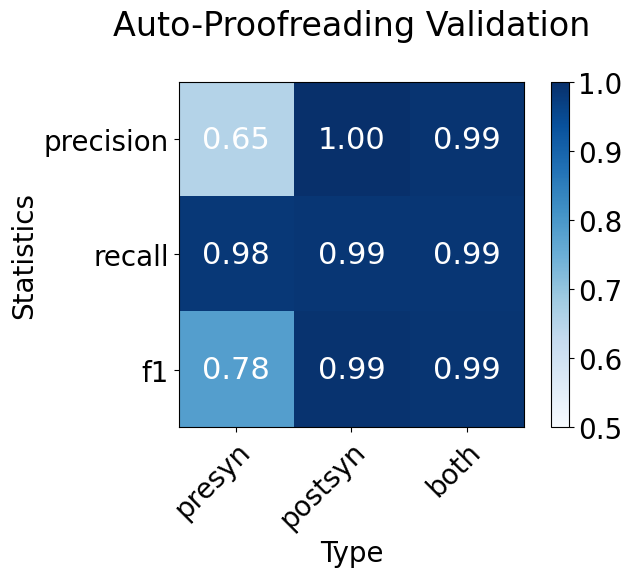

In [81]:
vu.synapse_validation_df_to_score_plot(validation_df)

Synapsse Results:
Total Number of Synapses = 7459
n_valid_syn_ids_presyn = 176
n_errored_syn_ids_presyn = 270
n_valid_syn_ids_postsyn = 6896
n_errored_syn_ids_postsyn = 117
Presyn counts:
TP:115
TN:268
FP:61
FN:2
Postsyn counts:
TP:6888
TN:33
FP:8
FN:84
Presyn counts:
TP:115
TN:268
FP:61
FN:2


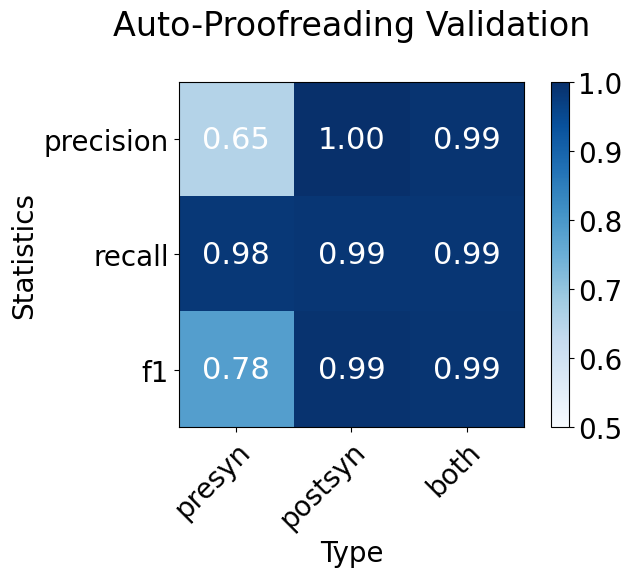

In [73]:
# if had the original
validation_df_original = vu.synapse_validation_df_single_neuron(segment_id,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False,)
vu.synapse_validation_df_to_category_counts(validation_df_original,
                                            print_postsyn=True,
                                            print_presyn=True)
vu.synapse_validation_df_to_score_plot(validation_df_original)

# Take the Synapse Data and Convert it into form that can be processed by the validation functions